**Name:** \_\_\_\_\_

**EID:** \_\_\_\_\_

# CS4487 - Tutorial 7
## Linear Dimensionality Reduction and Face Recognition

In this tutorial you will use linear dimensionality reduction on face images, and then train a classifier for face recognition.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import glob
import os
import IPython.utils.warn as warn
random.seed(100)

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
//anaconda/lib/python2.7/

## 1. Loading Data and Pre-processing
We first need to load the images.  Download `olivetti.pkz` from Canvas, and place it in in the same directory as this ipynb file.  _DO NOT UNZIP IT_.  Then run the following cell to load the images.

In [2]:
oli = datasets.fetch_olivetti_faces(data_home="./")
X = oli.data
Y = oli.target
img = oli.images
imgsize = oli.images[0].shape

Each image is a 64x64 array of pixel values, resulting in a 4096 dimensional vector.  Run the below code to show an example:

(64, 64)


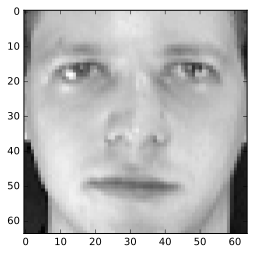

In [3]:
print img[0].shape
plt.imshow(img[0], cmap='gray', interpolation='nearest')
plt.show()

Run the below code to show all the images!

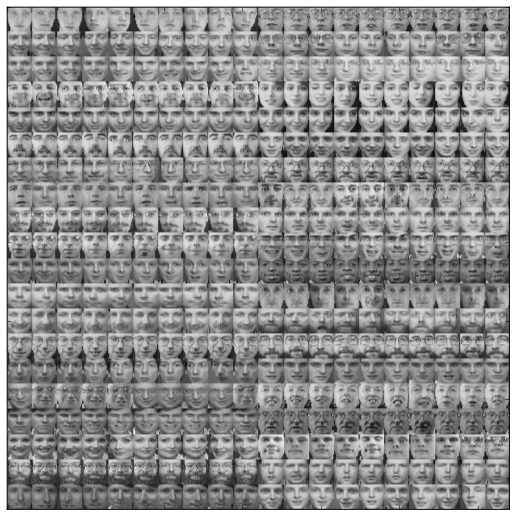

In [4]:
tmp = []
for i in range(0,400,20):
    tmp.append( hstack(img[i:i+20]) )
allimg = vstack(tmp)
plt.figure(figsize=(9,9))
plt.imshow(allimg, cmap='gray', interpolation='nearest')
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.show()

Each person is considered as one class, and there are 10 images for each class.  In total there are 40 classes (people).  The data is already vectorized and put into the matrix `X`. The class labels are in vector `Y`. Now we split the data into training and testing sets.

In [5]:
# randomly split data into 80% train and 20% test set
trainX, testX, trainY, testY = \
  cross_validation.train_test_split(X, Y, 
  train_size=0.80, test_size=0.20, random_state=4487)

print trainX.shape
print testX.shape

(320, 4096)
(80, 4096)


# 2. Linear Dimensionality Reduction - PCA
The dimension of the data is too large (4096) so learning classifiers will take a long time.  Instead, our strategy is to use PCA to reduce the dimension first and then use the PCA weights as the representation for each image.  Run PCA oon the data using 9 principal components.

In [6]:
### INSERT YOUR CODE HERE

In [7]:
### INSERT YOUR CODE HERE
pca = decomposition.PCA(n_components=9)
trainW = pca.fit_transform(trainX)  # fit the training set
testW  = pca.transform(testX)  # use the pca model to transform the test set

In [8]:
trainX.dtype

dtype('float32')

The below function will plot the basis vectors of PCA. Run the next 2 cells to view the PCs.

In [9]:
def plot_basis(model, imgsize):
    cname = model.__class__.__name__
    if  cname == 'LDA':
        KK = model.n_components
        comps = model.coef_
        mn    = None
    elif cname == 'PCA':
        KK = model.n_components_
        comps = model.components_
        mn    = model.mean_
    elif cname == 'NMF':
        KK = model.n_components_
        comps = model.components_
        mn    = None
    K = KK
    if mn is not None:
        K += 1        
    nr = ceil(K/5.0)
    sind = 1

    #vmin = comps.flatten().min()
    #vmax = comps.flatten().max()
    
    # plot the mean
    pcfig = plt.figure(figsize=(8,nr*2))
    if mn is not None:
        plt.subplot(nr,5,sind)
        plt.imshow(mn.reshape(imgsize), interpolation='nearest')
        plt.title("mean")
        plt.gray()
        plt.gca().xaxis.set_ticklabels([])
        plt.gca().yaxis.set_ticklabels([])    
        sind += 1
    # plot the components
    for j in range(0,KK):
        plt.subplot(nr,5,sind)
        v = comps[j,:]            
        I = v.reshape(imgsize)
        plt.imshow(I, interpolation='nearest')
        plt.gray()
        plt.title("basis " + str(j+1))
        plt.gca().xaxis.set_ticklabels([])
        plt.gca().yaxis.set_ticklabels([])
        sind += 1

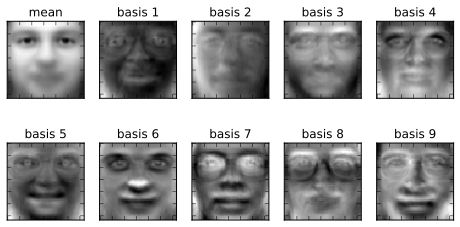

In [10]:
# run the function
plot_basis(pca, imgsize)

_ What do the basis images look like? Do some basis images correspond to particular facial features?_
- **INSERT YOUR ANSWER HERE**
- mean is the average face
- basis 7, 8, and 9 are different glasses frames
- basis 3 is about eye brows
- basis 4 is about eyes.

### Face Recognition
Now train a _linear_ classifier to do the face recognition.  Use the calculated PCA representation as the new set of inputs.  Use cross-validation to set the hyperparameters of the classifier.  _You do not need to do cross-validation for the number of components._  Calculate the average training and testing accuracies.  Remember to transform the test data into the PCA representation too!

**NOTE**: It is **NOT** recommended to use `svm.SVC` for the training.  This is because the default SVC implements 1-vs-1 multi-class classification, which means it will calculate 40x39=1560 classifiers!  All other classifier should be fine since they do 1-vs-all multi-class classification, e.g., LogisticRegressionCV, LinearSVC, etc.  If you want to use svm.SVC, make sure to use the OneVsRestClassifier as shown in Lecture 3.

In [11]:
### INSERT YOUR CODE HERE

In [12]:
### INSERT YOUR CODE HERE
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5)
logreg.fit(trainW, trainY)

# predict from the model
predYtrain = logreg.predict(trainW)
predYtest  = logreg.predict(testW)

# calculate accuracy
acc      = metrics.accuracy_score(trainY,predYtrain)
print "train accuracy =", acc

# calculate accuracy
acc      = metrics.accuracy_score(testY,predYtest)
print "test accuracy  =", acc

train accuracy = 0.840625
test accuracy  = 0.7


### Finding the best number of components
Now try a range of number of components for PCA to get the best test accuracy.  Train a classifier for each one and see which dimension gives the best testing accuracy.  Make a plot of PCA dimension vs. test accuracy.

In [13]:
### INSERT YOUR CODE HERE

In [18]:
trainX.shape

(320, 4096)

In [19]:
ns=[1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

params = {'C': logspace(-6,3,15)}
trainacc = []
testacc = []
for n in ns:
    pca = decomposition.PCA(n_components=n)
    trainW = pca.fit_transform(trainX)  # fit the training set
    testW  = pca.transform(testX)  # use the pca model to transform the test set

    clf = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5)
    clf.fit(trainW, trainY)
    
    # predict from the model
    predYtrain = clf.predict(trainW)
    predYtest  = clf.predict(testW)

    # calculate accuracy
    acc      = metrics.accuracy_score(trainY, predYtrain)
    trainacc.append(acc)

    # calculate accuracy
    acc      = metrics.accuracy_score(testY, predYtest)
    testacc.append(acc)
    print str(n) + ": " + str(acc)
    

1: 0.0375
5: 0.3625
10: 0.7
15: 0.8125
20: 0.9
25: 0.925
30: 0.925
35: 0.9125
40: 0.925
45: 0.9
50: 0.9125
55: 0.9125
60: 0.8875
65: 0.925
70: 0.925
75: 0.925
80: 0.9125
85: 0.925
90: 0.925


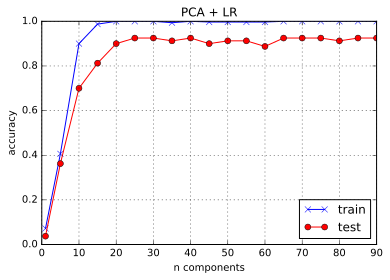

In [24]:
plt.plot(ns, trainacc, 'bx-', label='train')
plt.plot(ns, testacc, 'ro-', label='test')
plt.title("PCA + LR")
plt.legend(loc=0)
plt.grid(True); plt.xlabel('n components'); plt.ylabel('accuracy')

_What is the best number of components?  View the basis images to see what they look like_
- **INSERT YOUR ANSWER HERE**
- about 20 components is sufficient to get maximum accuracy

In [15]:
### INSERT YOUR CODE HERE

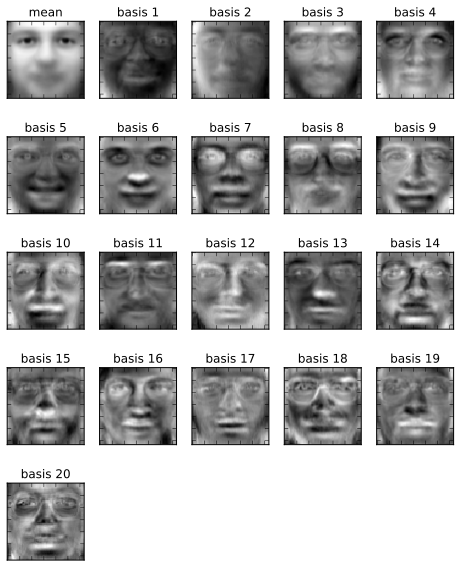

In [22]:
pca = decomposition.PCA(n_components=20)
trainW = pca.fit_transform(trainX)  # fit the training set
plot_basis(pca, imgsize)

# 3. Linear Dimensionality Reduction - NMF
Now we will repeat the experiment using non-negative matrix factorization instead of PCA.  Perform NMF with 9 components and visualize the basis images.

In [17]:
### INSERT YOUR CODE HERE

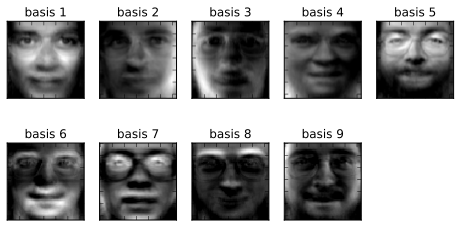

In [23]:
# Run NMF
nmf = decomposition.NMF(n_components=9)
trainW = nmf.fit_transform(trainX) 
testW  = nmf.transform(testX)

plot_basis(nmf, imgsize)

_What do the basis images look like?  What is the main difference with the PCA basis images?_
- **INSERT YOUR ANSWER HERE**
- components are "additive", and look more like face features
- basis 2 and 3 are left/right shading of the face
- basis 6 corresponds to mouth
- basis 8 correpsonds to eye brows

### Finding the best number of components
Now find the number of components that gives the best test accuracy.  Use the same type of classifier that you used in the previous experiment.  Use cross-validation to select the hyperparameters of the classifier.  You do not need to do cross-validation for the number of components.

In [19]:
### INSERT YOUR CODE HERE

In [25]:
ns=[1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

params = {'C': logspace(-6,3,15)}
trainacc = []
testacc = []
for n in ns:
    nmf = decomposition.NMF(n_components=n)
    trainW = nmf.fit_transform(trainX)  # fit the training set
    testW  = nmf.transform(testX)  # use the pca model to transform the test set
    
    clf = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=3)
    clf.fit(trainW, trainY)
    
    # predict from the model
    predYtrain = clf.predict(trainW)
    predYtest  = clf.predict(testW)

    # calculate accuracy
    acc      = mean(trainY==predYtrain)
    trainacc.append(acc)

    # calculate accuracy
    acc      = mean(testY==predYtest)
    testacc.append(acc)
    print str(n) + ": " + str(acc)

1: 0.025
5: 0.3125
10: 0.6875
15: 0.8625
20: 0.85
25: 0.8625
30: 0.85
35: 0.8625
40: 0.8625
45: 0.8125
50: 0.8625
55: 0.8625
60: 0.8875
65: 0.825
70: 0.875
75: 0.8625
80: 0.825
85: 0.825
90: 0.8


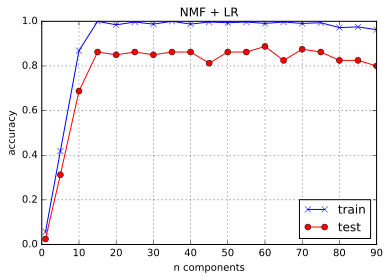

In [26]:
plt.plot(ns, trainacc, 'bx-', label='NMF train')
plt.plot(ns, testacc, 'ro-', label='NMF test')
plt.title("NMF + LR")
plt.legend(loc=0)
plt.grid(True); plt.xlabel('n components'); plt.ylabel('accuracy')

_Which number of components give the best test result? How does the accuracy compare to the best PCA result?  Why is NMF or PCA better?_
- **INSERT YOUR ANSWER HERE**
- around 20-60 components will have good results
- PCA is better (test accuracy > 90%).
- NMF causes LR to overfit (high training accuracy, but lower test accuracy)

In [21]:
### INSERT YOUR CODE HERE

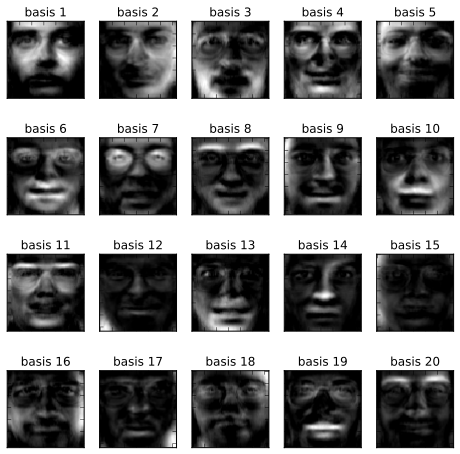

In [27]:
nmf = decomposition.NMF(n_components=20)
trainW = nmf.fit_transform(trainX) 
testW  = nmf.transform(testX)

plot_basis(nmf, imgsize)